#Instalar bibliotecas para usar o Azure

In [ ]:
!pip install azure.iot.device

#Importar bibliotecas

In [ ]:
from azure.iot.device import IoTHubDeviceClient, Message

#Configuração


1. Criar o Azure Hub IoT (https://docs.microsoft.com/pt-br/azure/iot-hub/iot-hub-create-through-portal)
  - Em tipo e escala de preço escolha: F1: Camada Gratuita 
2. Acessar o Azure Hub IoT recém criado
2. Clicar em "Dispositivos IoT", em seguida "+ Novo"
  - Adicione o nome que desejar e clique em "Salvar"
3. Clicar no dispositivo recem criado
4. Copie a Cadeia de Conexão Primária
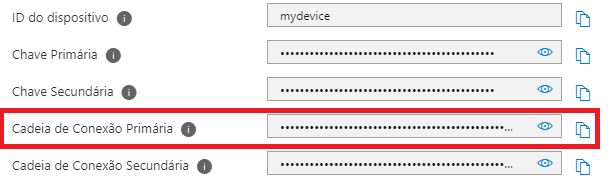




In [ ]:
STRING_CONEXAO="HostName=host.azure-devices.net;DeviceId=dispositivo-teste;SharedAccessKey=chave"

#Realize o teste de conexão

In [ ]:
# Criar uma instancia de cliente do Azure IoT Hub
cliente = IoTHubDeviceClient.create_from_connection_string(STRING_CONEXAO)

# Conectar
cliente.connect()

# Enviar um Teste
cliente.send_message("{\"mensagem\":\"teste\"}")

# Desconectar
cliente.shutdown()


#Recebendo Mensagens

In [ ]:
import threading

def tratar_msg(mensagem):
  print("Mensagem recebida")
  print(mensagem.data)

# Criar uma instancia de cliente do Azure IoT Hub
cliente = IoTHubDeviceClient.create_from_connection_string(STRING_CONEXAO)

# Conectar
cliente.connect()

# Definir ação ao receber mensagem
cliente.on_message_received = tratar_msg

# Aguarda usuário
while True:
  opcao = input("Pressione Q para fechar\n")
  if opcao == "q" or opcao == "Q":
    print("Encerrando...")
    break

# Desconectar
cliente.shutdown()

# Atividade

Você precisa desenvolver um "Semáforo IoT".
- A luz atualmente ativa deve ser enviada para nuvem;
- O intervalo entre as luzes Verde/Amarelo/Vermelho é de 5 segundos, pode ser configurado remotamente.
- A troca de mensagens deve ser no formato JSON
  - Status
    - {"luz": "nome da cor"} Ex. {"luz": "VERDE"}
  - Configuração
    - {"intervalo": valor inteiro em segundos} Ex. {"intervalo": 10} 

In [ ]:
import time

intervalo = 5

# Código Exemplo
def verde():
    print("VERDE")

def amarelo():
    print("AMARELO")

def vermelho():
    print("VERMELHO")

while True:
  verde()
  time.sleep(intervalo)
  amarelo()
  time.sleep(intervalo)
  vermelho()
  time.sleep(intervalo)

In [ ]:
from azure.iot.device import IoTHubDeviceClient, Message
import time
import json

intervalo = 5

STRING_CONEXAO=""

def tratar_msg(mensagem):
  print("Mensagem recebida")
  print(mensagem.data)
  try:
    dados = json.loads(mensagem.data)
    if dados["intervalo"] > 0:
      global intervalo
      intervalo = dados["intervalo"]
  except:
    print("Mensagem Inválida!")

# Código Exemplo
def verde():
    print("VERDE")
    dados = {"luz" : "VERDE"}
    saida  = json.dumps(dados)
    print(saida)
    cliente.send_message(saida)

def amarelo():
    print("AMARELO")
    cliente.send_message("{\"luz\":\"AMARELO\"}")

def vermelho():
    print("VERMELHO")
    cliente.send_message("{\"luz\":\"VERMELHO\"}")

# Criar uma instancia de cliente do Azure IoT Hub
cliente = IoTHubDeviceClient.create_from_connection_string(STRING_CONEXAO)

# Conectar
cliente.connect()

# Definir ação ao receber mensagem
cliente.on_message_received = tratar_msg

while True:
  verde()
  time.sleep(intervalo)
  amarelo()
  time.sleep(intervalo)
  vermelho()
  time.sleep(intervalo)

# Atividade 2

Devemos aprimorar nosso semáforo IoT:
- Introduzir os modos de operação (Normal, Piscante)
  - no modo piscante somente o amarelo pisca em um intervalo regular
    - {"modo": "tipo de operação} Ex. {"modo": "piscante"}
- Introduzir a mensagem de configuração de tempo por cor
  - Cada cor deve ter um tempo entre 1 e 30 segundos
    - {"intervalo_verde" : 10}
    - {"intervalo_amarelo" : 10}
    - {"intervalo_vemelho" : 10}

- Configurações inválidas são recusadas